In [1]:
import pandas as pd
from matplotlib import cm

from tiingo import TiingoClient
import quandl

import numpy as np
#import pandas as pd

from dateutil.relativedelta import relativedelta
import datetime

from sklearn.covariance import GraphicalLassoCV
from sklearn.covariance import GraphicalLasso

import seaborn as sns

import networkx as nx

import matplotlib.pyplot as plt

import json
import requests
import networkx as nx

import graph_tool.all as gt 

from IPython.display import Image
#Image("img/picture.png")

from datetime import date
from dateutil.relativedelta import relativedelta

import community as community_louvain
from netwulf import visualize

In [2]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [3]:
df = pd.read_csv("497-1min-bars.csv")
df

A     AAL     AAP     AAPL     ABBV      ABC     ABMD      ABT  \
0     147.740  21.465  206.35  136.525  114.140  116.210  313.740  116.965   
1     147.735  21.455  206.27  136.495  114.170  116.260  313.740  116.985   
2     147.700  21.455  206.29  136.455  114.165  116.270  313.740  116.930   
3     147.750  21.465  206.29  136.425  114.170  116.300  314.040  116.940   
4     147.745  21.455  206.29  136.330  114.170  116.230  314.040  116.910   
...       ...     ...     ...      ...      ...      ...      ...      ...   
9993  154.980  20.895  206.18  147.005  115.010  121.840  348.680  122.115   
9994  155.010  20.880  206.24  147.055  114.990  121.740  349.090  122.130   
9995  155.050  20.885  206.18  147.095  115.015  121.760  348.845  122.185   
9996  155.125  20.885  206.11  147.005  115.030  121.775  349.135  122.175   
9997  155.105  20.915  206.20  146.985  115.045  121.825  349.065  122.220   

          ACN     ADBE  ...     XEL     XLNX     XOM    XRAY      XYL  \
0     298.480  583.025  ...  66.780  141.425  63.480  63.905  120.180   
1     298.540  583.030  ...  66.785  141.270  63.495  63.905  120.180   
2     298.520  582.755  ...  66.775  141.240  63.505  63.900  120.180   
3     298.470  582.625  ...  66.770  141.065  63.540  63.920  120.135   
4     298.530  582.900  ...  66.790  141.110  63.570  63.920  120.135   
...       ...      ...  ...     ...      ...     ...     ...      ...   
9993  320.045  632.055  ...  69.355  150.330  57.095  59.780  127.260   
9994  320.090  632.050  ...  69.325  150.470  57.110  59.760  127.310   
9995  320.215  632.140  ...  69.325  150.585  57.100  59.800  127.340   
9996  320.225  631.990  ...  69.285  150.610  57.110  59.815  127.300   
9997  320.240  632.215  ...  69.245  150.620  57.135  59.815  127.365   

          YUM      ZBH     ZBRA    ZION      ZTS  
0     115.980  161.635  522.110  53.530  188.450  
1     115.940  161.625  522.340  53.555  188.500  
2     115.935  161.660  522.045  53.625  188.520  
3     115.995  161.750  522.210  53.595  188.535  
4     115.950  161.790  522.210  53.645  188.530  
...       ...      ...      ...     ...      ...  
9993  133.650  150.020  568.540  53.010  203.570  
9994  133.660  150.170  568.240  53.010  203.605  
9995  133.660  150.180  568.860  53.035  203.700  
9996  133.650  150.170  569.060  53.055  203.680  
9997  133.660  150.155  568.520  53.105  203.680  

[9998 rows x 496 columns]

In [4]:
missing_values_table(df)

Your selected dataframe has 496 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [5]:
df = np.log1p(df.pct_change()).iloc[1:]
df /= df.std(axis=0)
#df /= df.mad(axis=0)
df

A       AAL       AAP      AAPL      ABBV       ABC      ABMD  \
1    -0.081943 -0.308812 -0.567228 -0.307729  0.514433  0.501032  0.000000   
2    -0.573677  0.000000  0.141828 -0.410410 -0.085729  0.100181  0.000000   
3     0.819497  0.308812  0.000000 -0.307886  0.085729  0.300490  1.005166   
4    -0.081937 -0.308812  0.000000 -0.975421  0.000000 -0.701264  0.000000   
5    -0.737560 -0.618057  0.177265 -0.256803  0.685700  0.300593 -0.770542   
...        ...       ...       ...       ...       ...       ...       ...   
9993  1.328293  0.952172 -0.425628  0.619282  1.362096 -0.095593  0.829796   
9994  0.468635 -0.475915  0.425628  0.476184 -0.340435 -0.956359  1.235935   
9995  0.624706  0.158676 -0.425628  0.380831  0.425535  0.191335 -0.738372   
9996  1.170890  0.000000 -0.496722 -0.857015  0.255276  0.143480  0.873935   
9997 -0.312182  0.951261  0.638612 -0.190519  0.255243  0.478140 -0.210883   

           ABT       ACN      ADBE  ...       XEL      XLNX       XOM  \
1     0.320457  0.434221  0.014265  ...  0.146116 -0.846005  0.262051   
2    -0.881388 -0.144731 -0.784764  ... -0.292242 -0.163850  0.174666   
3     0.160283 -0.361869 -0.371108  ... -0.146138 -0.956487  0.611115   
4    -0.480890  0.434236  0.784939  ...  0.584484  0.246067  0.523545   
5    -2.406305  0.072364  0.599158  ... -0.292220 -0.984739 -0.436270   
...        ...       ...       ...  ...       ...       ...       ...   
9993  0.690806 -0.033750 -0.065792  ...  0.844358  1.232656  0.194277   
9994  0.230212  0.303731 -0.013159  ... -0.844358  0.718141  0.291352   
9995  0.843869  0.843474  0.236840  ...  0.000000  0.589402 -0.194226   
9996 -0.153402  0.067464 -0.394752  ... -1.126380  0.128071  0.194226   
9997  0.690212  0.101192  0.592093  ... -1.127030  0.051223  0.485417   

          XRAY       XYL       YUM       ZBH      ZBRA      ZION       ZTS  
1     0.000000  0.000000 -0.563664 -0.064314  0.535945  0.372057  0.397550  
2    -0.085290  0.000000 -0.070472  0.225082 -0.687450  1.040836  0.158991  
3     0.341119 -0.561620  0.845459  0.578558  0.384554 -0.445906  0.119232  
4     0.000000  0.000000 -0.634053  0.257034  0.000000  0.743038 -0.039743  
5     0.000000 -0.374530  0.000000 -0.803441  0.000000 -0.222839 -0.874610  
...        ...       ...       ...       ...       ...       ...       ...  
9993  0.912096  0.235697  0.122269  0.138592  1.831393  0.601498  0.073616  
9994 -0.364747  0.589080  0.122260  1.038851 -0.642280  0.000000  0.257628  
9995  0.729371  0.353337  0.000000  0.069220  1.327006  0.375706  0.699052  
9996  0.273389 -0.471134 -0.122260 -0.069220  0.427758  0.300437 -0.147142  
9997  0.000000  0.765518  0.122260 -0.103838 -1.155292  0.750597  0.000000  

[9997 rows x 496 columns]

In [6]:
def LassoCV(df,cv, threshold=0.00):
    edge_model = GraphicalLassoCV(cv=cv)
    edge_model.fit(df)
  
    p = edge_model.precision_
    p = pd.DataFrame(p, columns=df.columns.values.tolist() , index=df.columns.values.tolist() )


    links = p.stack().reset_index()
    links.columns = ['var1', 'var2','value']
    links['value'] = abs(links['value'])
    links=links.loc[ (abs(links['value']) > threshold) &  (links['var1'] != links['var2']) ] 

    G=nx.from_pandas_edgelist(links,'var1','var2',edge_attr='value', create_using=nx.Graph())
    return G

In [7]:
def louvainViz(G):
    partition = community_louvain.best_partition(G)
    pos = nx.kamada_kawai_layout(G)
# color the nodes according to their partition
    plt.figure(3, figsize=(20, 6))
    cmap = cm.get_cmap('hsv', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50,
                       cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    nx.draw_networkx_labels(G, pos=pos)
    plt.show()

In [8]:
def returnJsonGraph(G):
    tempList = list(G.nodes)
    tempDictionary = {}
    tempArray = []
    tempArray2 = []
    temp = {}
    for node in tempList:
        temp2 = {'id':str(node), "group": 1} 
        tempArray.append(temp2)
        tempDictionary["nodes"] = tempArray
        
    edgeview = list(G.edges(data=False))
    for edge in edgeview:
        temp = {'source': str(edge[0]), 'target': str(edge[1]), 'value': 1.0}
        tempArray2.append(temp)
    tempDictionary['links'] = tempArray2
    return tempDictionary

In [9]:
#from netwulf import visualize

#G = nx.barabasi_albert_graph(100,m=1)
#visualize(G)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


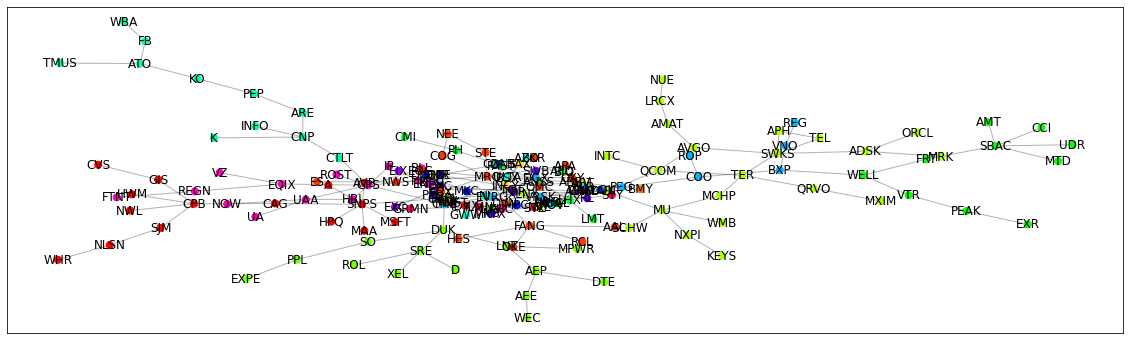

In [12]:
G  = LassoCV(df[20:60], 10, 0.50)
louvainViz(G)

In [13]:
#links
#links.sort_values(by=['value'])
#links.hist(bins=200)
#visualize(G)

In [14]:
functiontest = returnJsonGraph(G)


{'nodes': [{'id': 'A', 'group': 1},
  {'id': 'SNPS', 'group': 1},
  {'id': 'AAL', 'group': 1},
  {'id': 'FANG', 'group': 1},
  {'id': 'ABBV', 'group': 1},
  {'id': 'BMY', 'group': 1},
  {'id': 'BSX', 'group': 1},
  {'id': 'ABMD', 'group': 1},
  {'id': 'BIO', 'group': 1},
  {'id': 'ABT', 'group': 1},
  {'id': 'INCY', 'group': 1},
  {'id': 'ADI', 'group': 1},
  {'id': 'MU', 'group': 1},
  {'id': 'QCOM', 'group': 1},
  {'id': 'XLNX', 'group': 1},
  {'id': 'ADSK', 'group': 1},
  {'id': 'MRK', 'group': 1},
  {'id': 'ORCL', 'group': 1},
  {'id': 'SWKS', 'group': 1},
  {'id': 'AEE', 'group': 1},
  {'id': 'AEP', 'group': 1},
  {'id': 'WEC', 'group': 1},
  {'id': 'DTE', 'group': 1},
  {'id': 'LNT', 'group': 1},
  {'id': 'AMAT', 'group': 1},
  {'id': 'AVGO', 'group': 1},
  {'id': 'LRCX', 'group': 1},
  {'id': 'AMT', 'group': 1},
  {'id': 'SBAC', 'group': 1},
  {'id': 'ANSS', 'group': 1},
  {'id': 'FAST', 'group': 1},
  {'id': 'LHX', 'group': 1},
  {'id': 'APA', 'group': 1},
  {'id': 'MRO', 'grou

In [17]:
json.dumps(functiontest)

'{"nodes": [{"id": "A", "group": 1}, {"id": "SNPS", "group": 1}, {"id": "AAL", "group": 1}, {"id": "FANG", "group": 1}, {"id": "ABBV", "group": 1}, {"id": "BMY", "group": 1}, {"id": "BSX", "group": 1}, {"id": "ABMD", "group": 1}, {"id": "BIO", "group": 1}, {"id": "ABT", "group": 1}, {"id": "INCY", "group": 1}, {"id": "ADI", "group": 1}, {"id": "MU", "group": 1}, {"id": "QCOM", "group": 1}, {"id": "XLNX", "group": 1}, {"id": "ADSK", "group": 1}, {"id": "MRK", "group": 1}, {"id": "ORCL", "group": 1}, {"id": "SWKS", "group": 1}, {"id": "AEE", "group": 1}, {"id": "AEP", "group": 1}, {"id": "WEC", "group": 1}, {"id": "DTE", "group": 1}, {"id": "LNT", "group": 1}, {"id": "AMAT", "group": 1}, {"id": "AVGO", "group": 1}, {"id": "LRCX", "group": 1}, {"id": "AMT", "group": 1}, {"id": "SBAC", "group": 1}, {"id": "ANSS", "group": 1}, {"id": "FAST", "group": 1}, {"id": "LHX", "group": 1}, {"id": "APA", "group": 1}, {"id": "MRO", "group": 1}, {"id": "APD", "group": 1}, {"id": "CF", "group": 1}, {"id

In [16]:
#G = test
partition = community_louvain.best_partition(G)
len(partition)

176

In [23]:
nx.set_node_attributes(G,{ n: [] for n in G.nodes() },'partition')

In [27]:
G.nodes.values

<bound method Mapping.values of NodeView(('A', 'MU', 'NOW', 'NVR', 'SBAC', 'SNPS', 'AAL', 'FANG', 'AAP', 'ARE', 'AWK', 'BDX', 'CRM', 'HST', 'INCY', 'IRM', 'MCK', 'NRG', 'ORCL', 'PSA', 'QRVO', 'REGN', 'VTR', 'WHR', 'WST', 'AAPL', 'CMS', 'PAYC', 'ABBV', 'ADSK', 'BMY', 'BSX', 'GILD', 'MRK', 'ULTA', 'ABC', 'TPR', 'ABMD', 'BIO', 'ILMN', 'MRO', 'NWS', 'PLD', 'ZBRA', 'ABT', 'ROP', 'SRE', 'ACN', 'ADBE', 'AEP', 'AVGO', 'ENPH', 'KEYS', 'LHX', 'MXIM', 'NI', 'TER', 'ADI', 'AMAT', 'CNP', 'FB', 'INTU', 'LRCX', 'QCOM', 'TXN', 'XLNX', 'ADP', 'EBAY', 'SWKS', 'AEE', 'DTE', 'ED', 'GIS', 'GPS', 'KR', 'WEC', 'XEL', 'ALL', 'CSCO', 'D', 'DUK', 'ES', 'ETR', 'GD', 'HSY', 'HUM', 'LNT', 'MDLZ', 'MPWR', 'OXY', 'PEG', 'RSG', 'SO', 'WM', 'AES', 'AIG', 'AKAM', 'MKC', 'ALB', 'COG', 'ALGN', 'PPL', 'ALK', 'CPB', 'O', 'TEL', 'WRB', 'ATO', 'WBA', 'AMCR', 'BLL', 'PYPL', 'SYY', 'TMUS', 'AMD', 'NXPI', 'TSLA', 'AMGN', 'BLK', 'COP', 'EXR', 'IR', 'K', 'MOS', 'NKE', 'UNH', 'WRK', 'AMP', 'AMT', 'ANSS', 'CCI', 'CF', 'EW', 'MAS', 

NetworkXError: Node 'A' has no position.

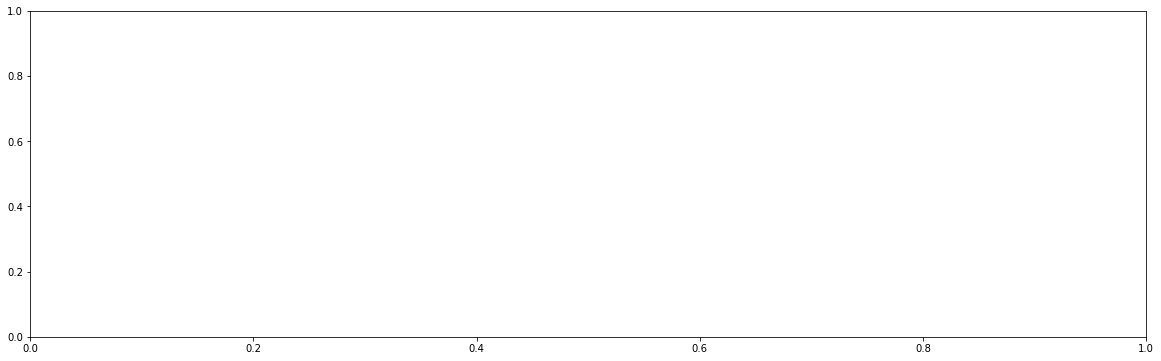

In [257]:

pos = nx.kamada_kawai_layout(G)
# color the nodes according to their partition
plt.figure(3, figsize=(20, 6))
cmap = cm.get_cmap('hsv', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)


plt.show()

In [149]:
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:20]

[('PAYC', 0.47369497697804375),
 ('SNPS', 0.16975361916591133),
 ('MU', 0.16928123442307763),
 ('TPR', 0.1395831106064126),
 ('NVR', 0.1393853144756298),
 ('FANG', 0.13874441157565243),
 ('WBA', 0.13720894126080224),
 ('INCY', 0.12480793376999375),
 ('MRO', 0.12180274776265919),
 ('ATO', 0.11801636129824354),
 ('NKE', 0.10231989813986184),
 ('O', 0.10150904095231708),
 ('GPS', 0.10033419757088337),
 ('SBAC', 0.10017604864934287),
 ('CPB', 0.09737986694808196),
 ('NI', 0.09438773496903663),
 ('ARE', 0.09364157453826695),
 ('COO', 0.09334398291261174),
 ('CNP', 0.09226950982346702),
 ('ED', 0.09222588885112953)]

In [ ]:
#G1  = LassoCV(df[20:60], 10, 0.00)

In [197]:
Gstart  = LassoCV(df[20:60], 15, 0.00)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


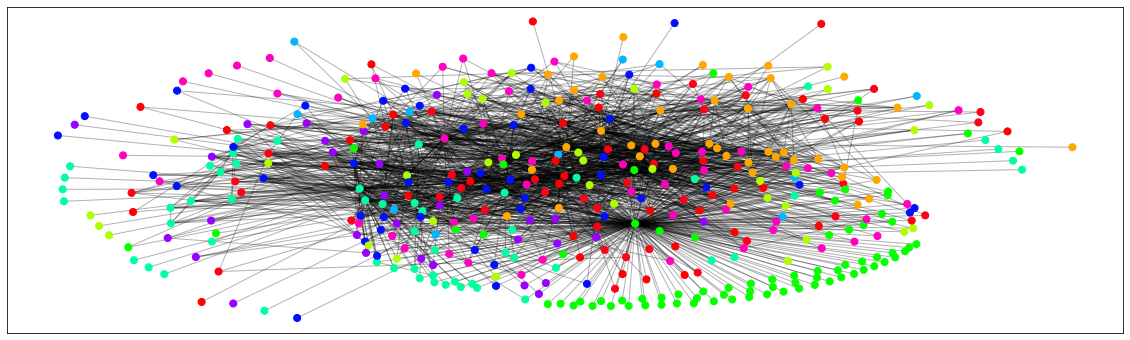

In [217]:
louvainViz(G)

In [ ]:
Gstart20  = LassoCV(df[20:60], 20, 0.50)

In [201]:
Gstart20  = LassoCV(df[20:60], 20, 0.50)
Gstart10  = LassoCV(df[20:60], 10, 0.50)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] =

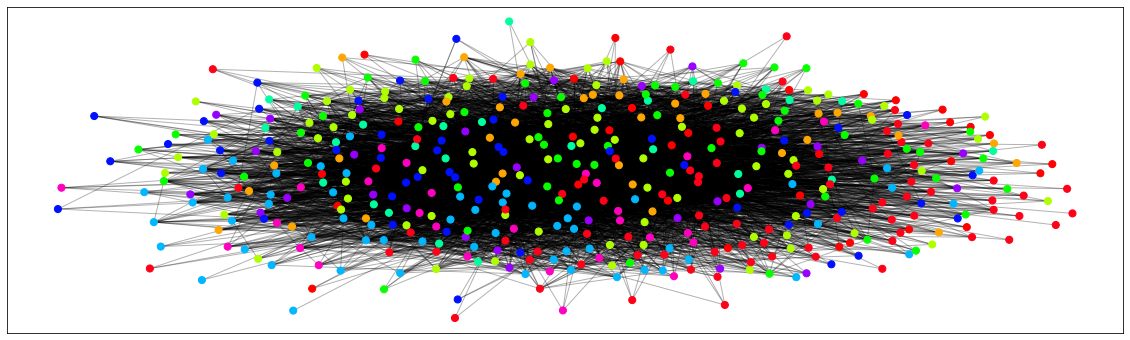

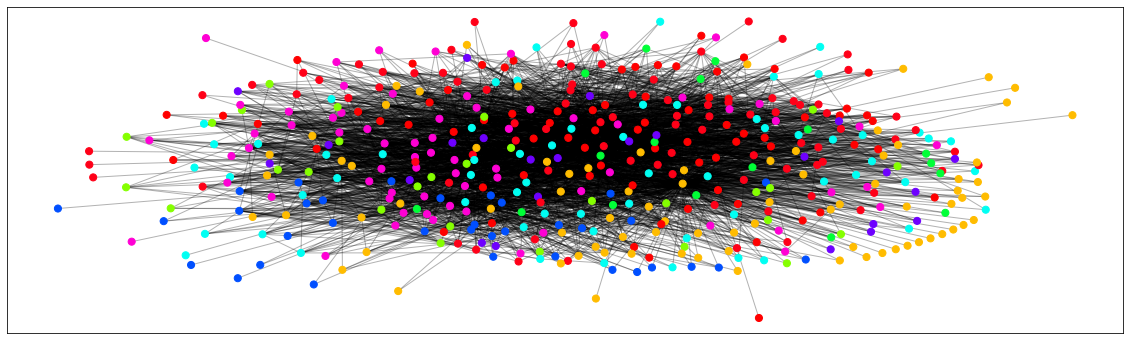

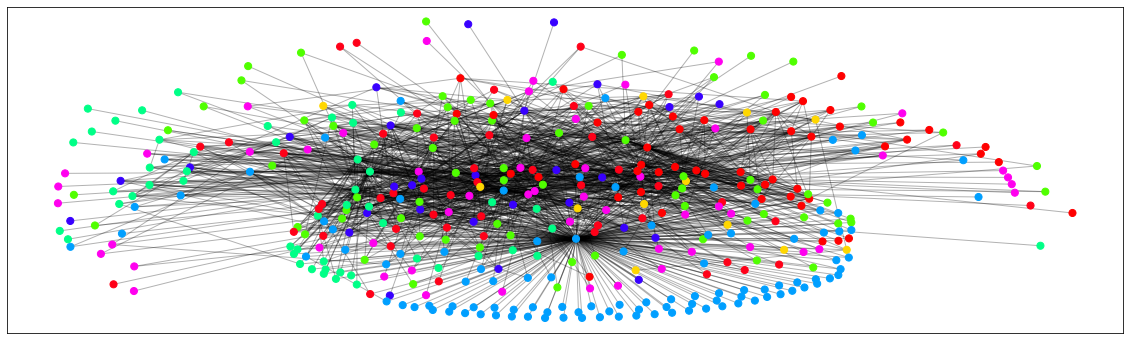

In [203]:
louvainViz(Gstart20)
louvainViz(Gstart)
louvainViz(Gstart10)

In [218]:
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('PAYC', 0.46371865124917483),
 ('SNPS', 0.16701077843787143),
 ('MU', 0.15970367025787416),
 ('NVR', 0.1472365293754921),
 ('WBA', 0.14612881487963741),
 ('FANG', 0.14058146585141024),
 ('TPR', 0.12777005177747716),
 ('MRO', 0.12198277299006138),
 ('INCY', 0.11848382277071406),
 ('ATO', 0.11540710634928855)]

In [208]:
eigenvector = nx.eigenvector_centrality(Gstart)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('PAYC', 0.3726922449310929),
 ('NVR', 0.16624586293112623),
 ('SNPS', 0.15629626975761116),
 ('INCY', 0.14685319565817406),
 ('WBA', 0.13766517372598555),
 ('TPR', 0.12423666372223831),
 ('MU', 0.12352717803106436),
 ('FANG', 0.11988690462815174),
 ('NI', 0.11413194768154483),
 ('MKC', 0.11139302113055156)]

In [209]:
eigenvector = nx.eigenvector_centrality(Gstart10)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('PAYC', 0.47369497697804375),
 ('SNPS', 0.16975361916591133),
 ('MU', 0.16928123442307763),
 ('TPR', 0.1395831106064126),
 ('NVR', 0.1393853144756298),
 ('FANG', 0.13874441157565243),
 ('WBA', 0.13720894126080224),
 ('INCY', 0.12480793376999375),
 ('MRO', 0.12180274776265919),
 ('ATO', 0.11801636129824354)]

In [267]:
G  = LassoCV(df[1:40], 10, 0.00)
#G1  = LassoCV(df[1540:1580], 10, 0.00)
#G2  = LassoCV(df[1560:1600], 10, 0.00)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


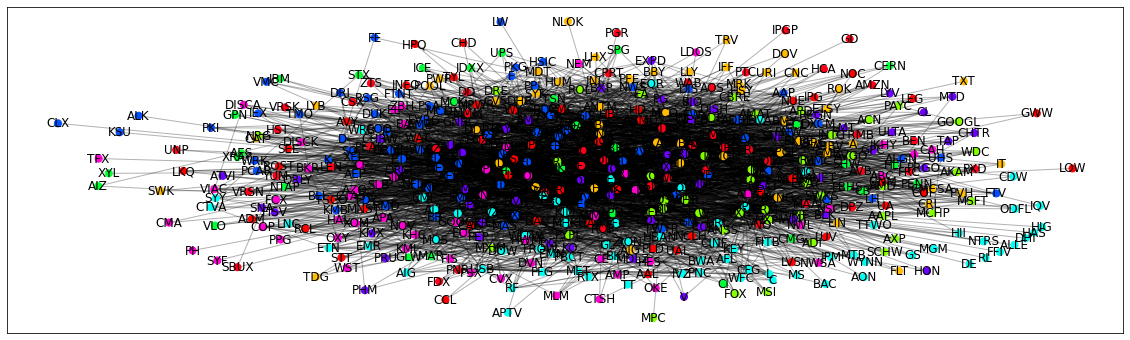

In [268]:
louvainViz(G)
#louvainViz(G1)
#louvainViz(G2)

In [256]:
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('AVGO', 0.31237596265425055),
 ('NEM', 0.28541000306899017),
 ('WELL', 0.2358547765143842),
 ('EIX', 0.22006162086390146),
 ('MKC', 0.19321618926761516),
 ('FANG', 0.17650888621637245),
 ('ARE', 0.17516370598398082),
 ('AMAT', 0.15391673097577435),
 ('ZBRA', 0.15357422253165642),
 ('ADBE', 0.1521961616529777)]

In [ ]:
windowLength = 40
start = 1
gap = 20
samples = 5
tempDFList = []

G1  = LassoCV(df[20:60], 10, 0.00)
G2  = LassoCV(df[30:70], 10, 0.00)
G3  = LassoCV(df[40:80], 10, 0.00)
G4  = LassoCV(df[50:90], 10, 0.00)
G5  = LassoCV(df[60:100], 10, 0.00)

In [ ]:
G3  = LassoCV(df[40:80], 10, 0.00)

louvainViz(G3)

In [223]:
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:20]

[('PAYC', 0.7024758752244217),
 ('TPR', 0.08551523789697324),
 ('SNPS', 0.08451593301592995),
 ('CNP', 0.07795630348283994),
 ('NI', 0.0757226273087828),
 ('DXC', 0.07160294017995643),
 ('NKE', 0.07160294017995643),
 ('VTR', 0.07160294017995643),
 ('NOW', 0.07151215015771636),
 ('ARE', 0.0709160741549436),
 ('NLSN', 0.0707131164025569),
 ('DUK', 0.06775579919811099),
 ('GPS', 0.0668981726570504),
 ('EW', 0.06569167639815172),
 ('VFC', 0.06569167639815172),
 ('SBAC', 0.06562870015565539),
 ('VRTX', 0.06562870015565539),
 ('DTE', 0.06525323333324505),
 ('QRVO', 0.06518415623328773),
 ('STE', 0.0650935349461269)]

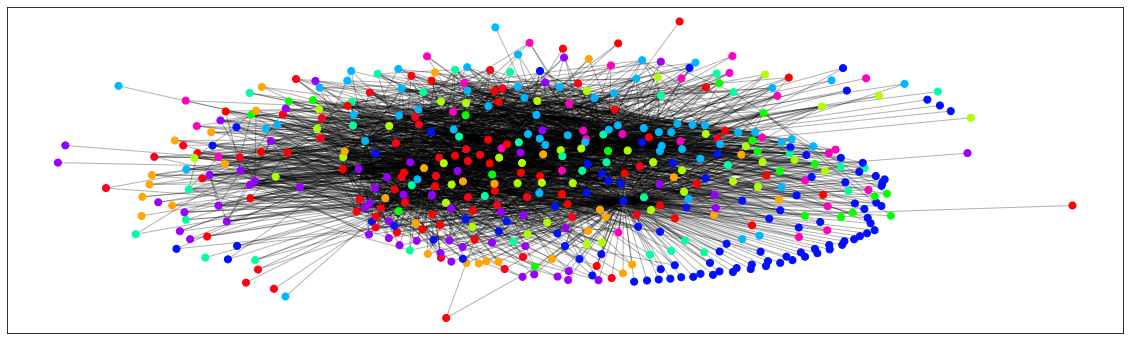

In [168]:
louvainViz(G2)

In [162]:
eigenvector = nx.eigenvector_centrality(G2)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:20]

[('PAYC', 0.4291522269530597),
 ('INCY', 0.16514948649492786),
 ('NVR', 0.14727981649471952),
 ('WBA', 0.14273647713240456),
 ('SNPS', 0.1324458368181602),
 ('GPS', 0.11776314323553992),
 ('O', 0.11225026954565338),
 ('ED', 0.10944492789824815),
 ('NI', 0.10880309054281183),
 ('FANG', 0.10590558806510025),
 ('CPB', 0.10123160632167591),
 ('ARE', 0.10113195776426935),
 ('MRO', 0.09865929023339169),
 ('CMS', 0.09331019256498282),
 ('VTR', 0.09047395834496388),
 ('ORCL', 0.08919691574555971),
 ('MU', 0.0890576370976991),
 ('CNP', 0.08853086176427778),
 ('NKE', 0.08823435419562604),
 ('ATO', 0.08539452882638252)]

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


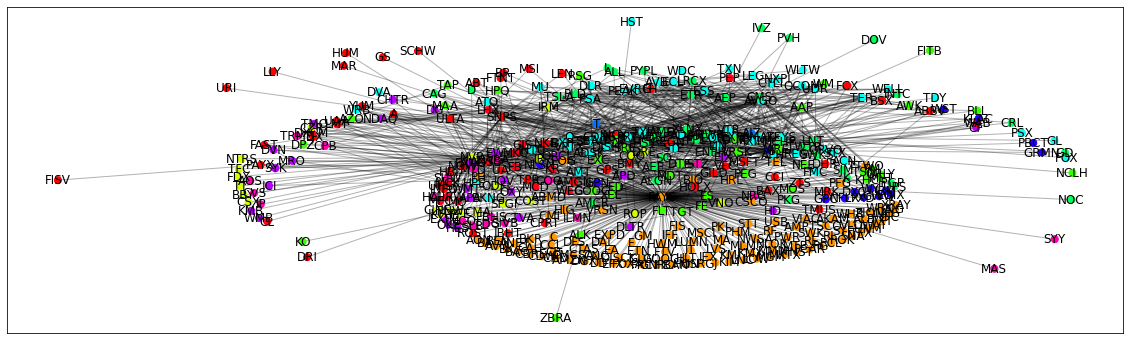

In [269]:
G3  = LassoCV(df[40:80], 10, 0.00)
louvainViz(G3)

In [163]:
eigenvector = nx.eigenvector_centrality(G3)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:20]

[('PAYC', 0.5575127235797491),
 ('O', 0.13314765112510465),
 ('AMD', 0.129587821897045),
 ('WBA', 0.12269834288183532),
 ('INCY', 0.12249670839524282),
 ('SNPS', 0.11731671845619392),
 ('VTR', 0.11598764888229948),
 ('NI', 0.10814423517601922),
 ('NVR', 0.10800988006181306),
 ('FANG', 0.09871550517219946),
 ('AVGO', 0.09842300917566163),
 ('TYL', 0.09828740807280653),
 ('MKC', 0.09298568663755583),
 ('LNT', 0.09247146046532705),
 ('SBAC', 0.08992458515649672),
 ('DUK', 0.08759369637004726),
 ('CNP', 0.08614369474114346),
 ('GIS', 0.08523940780359149),
 ('BXP', 0.08262047978634757),
 ('XLNX', 0.08240683260407478)]

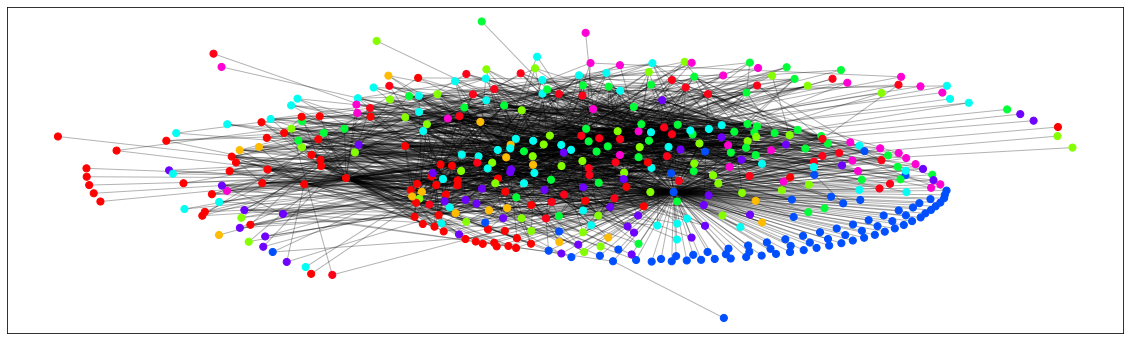

In [170]:
louvainViz(G4)

In [164]:
eigenvector = nx.eigenvector_centrality(G4)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:20]

[('PAYC', 0.4964056257195863),
 ('FANG', 0.13182218941302415),
 ('WBA', 0.12855543462160668),
 ('AEP', 0.11729574503739813),
 ('NI', 0.11176405482424376),
 ('STZ', 0.10838854349114316),
 ('LNT', 0.10373802542906226),
 ('LHX', 0.10063788952305022),
 ('O', 0.10015562313179446),
 ('MRO', 0.096478332906012),
 ('DUK', 0.09642607307710244),
 ('VTR', 0.09249362179772028),
 ('CNP', 0.09123163486623667),
 ('HSY', 0.0907811176061867),
 ('NKE', 0.0892730096784823),
 ('INCY', 0.08345368187355072),
 ('DG', 0.0816421254009932),
 ('MKC', 0.08119911291767964),
 ('AMD', 0.08078195497353056),
 ('APA', 0.07898558597536959)]

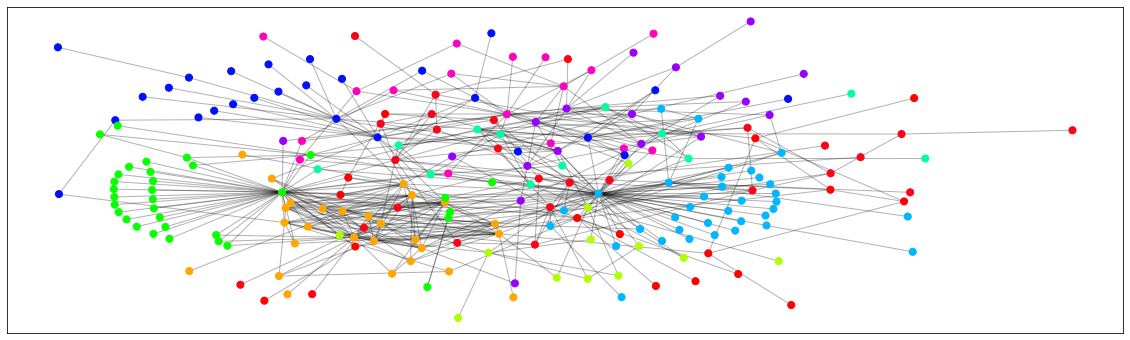

In [171]:
louvainViz(G5)

In [165]:
eigenvector = nx.eigenvector_centrality(G5)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:20]

[('MRO', 0.3024518644291896),
 ('APA', 0.30237507492034327),
 ('XOM', 0.2851347911129811),
 ('COP', 0.24957230639823044),
 ('PAYC', 0.24323502956797471),
 ('FANG', 0.23876842992930788),
 ('COG', 0.22012060418143367),
 ('CVX', 0.21967746771728736),
 ('NOV', 0.21176850704901923),
 ('SLB', 0.20008037540868462),
 ('OXY', 0.19438264529740817),
 ('HAL', 0.18614440910920146),
 ('WMB', 0.17983755580898314),
 ('DVN', 0.1698307745203587),
 ('MPC', 0.1690311181688378),
 ('KMI', 0.16464878265106764),
 ('VLO', 0.14448296428630922),
 ('EOG', 0.12957973541751885),
 ('OKE', 0.1282869348536487),
 ('PSX', 0.09033377931414302)]

In [160]:
start = 20
length = 40
end = start + length
samples = 5
tempDFList = []

for i in range(samples):
    if i == 0:
        LassoCV(df[start:end], 10, 0.00)
    
        

0


In [47]:
length = 60
window = 30

#tempDF = df[(-1-length * 2):-1]
tempDF = df[(-1-length * 2):-1]
len(tempDF[:length])

60

In [51]:
def splitDF(df, window):
    tempDFList = []
    #entropy = []
    tempDF = df[(-1-window * 2):-1]
    for i in range(window):
        tempDFList.append(tempDF[i:length+i])
    return tempDFList

In [52]:
def splitDFTwo(df,length, window):
    tempDFList = []
    tempDF = df[(-1-length):-1]
    for i in range(window):
        tempDFList.append(tempDF[i:window+i])
    return tempDFList

In [53]:
#returns a list of sub dataframes from input DF

def splitDF3(df,window, samples):
    if len(df) < (window + samples):
        return print("error")
    tempDFList = []
    start = window + samples
    tempDF = df[(-1-start):-1]
    for i in range(samples):
        tempDFList.append(tempDF[i:window+i])
    return tempDFList

In [60]:
window = 30
samples = 10
templist30 = splitDF3(df,window, samples)
templist30[7]['PAYC']


9964   -0.477236
9965   -0.041877
9966    0.602808
9967   -0.661440
9968    0.761862
9969   -0.426884
9970    0.359937
9971   -0.485537
9972    0.234436
9973    0.041856
9974   -0.427038
9975    0.435409
9976    0.159030
9977    0.727766
9978   -0.242511
9979    1.253537
9980   -0.200427
9981   -0.225544
9982    0.033418
9983   -0.217244
9984    0.317490
9985   -0.459567
9986    0.476274
9987   -0.058474
9988   -0.217227
9989   -0.200573
9990    0.860418
9991    0.175306
9992   -0.308899
9993    0.417402
Name: PAYC, dtype: float64

In [24]:
#ten = LassoCV(templist30[9],tiingoList)
#ten2 = LassoCV(templist30[8],tiingoList)
ten3 = LassoCV(templist30[3],tiingoList)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [75]:

listG = []

for i in range(length):
    G = LassoCV(templist30[i],tiingoList)
    listG.append(G)
    print(i)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

0


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

1


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

2


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

3


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

4


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

5


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

6


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample availabl

7


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

8


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample availabl

9


IndexError: list index out of range

In [91]:
centralityList = []
for i in range(len(listG)):
    temp = nx.eigenvector_centrality(listG[i])
    gl = temp['GL']
    centralityList.append(gl)
centralityList[0]

0.39768438920345267

<AxesSubplot:>

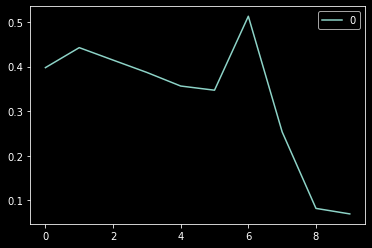

In [92]:
import matplotlib.pyplot as plt
entDF = pd.DataFrame(centralityList)
plt.style.use('dark_background')
entDF.plot()

In [32]:
#centrality(ten3)
eigenvector = nx.eigenvector_centrality(ten3)
eigenvector.items(),

(dict_items([('A', 0.005431702912363499), ('APTV', 0.10521280488477563), ('AAL', 0.026036836367400368), ('DAL', 0.10108244853928447), ('EBAY', 0.009635781087229319), ('HBAN', 0.06237799905408821), ('LYV', 0.0781809248517418), ('MO', 0.03372382556861183), ('NCLH', 0.05021291814094153), ('RCL', 0.024246053707195736), ('UAL', 0.0455979542183593), ('WDC', 0.09927589360091012), ('AAPL', 0.01324302497414701), ('IPGP', 0.043912448722775936), ('STX', 0.11332597305176884), ('ABC', 0.0016669602600723398), ('MCK', 0.013373504360999907), ('TMUS', 0.005974029046116001), ('VRSK', 0.012942866426009055), ('ABMD', 0.012867983104155661), ('CTXS', 0.0026942545704051932), ('EW', 0.036037959582400275), ('HSY', 0.03959259175124939), ('ISRG', 0.08302522710526694), ('KMB', 0.025126318940305956), ('NOC', 0.039205988708307514), ('NOW', 0.008698198426880794), ('PTC', 0.0023945021367265556), ('TFX', 0.012486753477233542), ('ACN', 0.03377244444869943), ('DOV', 0.08349070990256445), ('EXC', 0.05498963858004353), ('

In [23]:
centrality(ten2)

[('COG', 0.2854905509835384),
 ('HAL', 0.2389425806137137),
 ('PSX', 0.22063115696053182),
 ('AMZN', 0.21881030860332723),
 ('LNC', 0.21779860770845824),
 ('UNM', 0.21066017274607463),
 ('NKE', 0.20890485015648763),
 ('FANG', 0.2088471886753693),
 ('OXY', 0.18087552724810568),
 ('PRU', 0.1643283715555563)]

In [38]:
centrality(ten3)

[('HPQ', 0.20115580371486183),
 ('MAS', 0.20006246554269355),
 ('TEL', 0.19797972109897546),
 ('DHI', 0.18962408165177366),
 ('HD', 0.16690404008690357),
 ('XYL', 0.16389984251548573),
 ('JNPR', 0.15617860361148708),
 ('LOW', 0.1474533845692629),
 ('MHK', 0.14011880397949114),
 ('SIVB', 0.1348001836806055)]

In [88]:
G = listG[5]
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('GL', 0.3470678896244403),
 ('UNM', 0.2727930950855838),
 ('NTRS', 0.2726447201567558),
 ('LNC', 0.2631252953891755),
 ('EMR', 0.23730136286755094),
 ('TFC', 0.22113765848261968),
 ('MET', 0.20855804514065976),
 ('ZION', 0.18747976358455595),
 ('PRU', 0.18396081583886306),
 ('RF', 0.18274343121860617)]

In [22]:
#entropy = []
listG = []
listState = []
for i in range(5):
    G = LassoCV(templist30[i],tiingoList)
    print(i)
    #tempGT = nxToGT(G)
    #tempState = gt.minimize_nested_blockmodel_dl(G, deg_corr=True)
    #tempEntropy = tempState.entropy()
    #listState.append(tempState)
    listG.append(G)
    print(i)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply


0
0


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


1
1


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

2
2


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

3
3


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

4
4


In [23]:
eigenvector = nx.eigenvector_centrality(listG[0])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('MAS', 0.3097110697831162),
 ('DHI', 0.20998069009902698),
 ('XYL', 0.20686868071655032),
 ('HD', 0.2064808004308862),
 ('TEL', 0.1946459193090473),
 ('MHK', 0.18181635501953144),
 ('SWK', 0.17298906799791183),
 ('FBHS', 0.17085219444517835),
 ('ITW', 0.1608334748088432),
 ('AOS', 0.14340018282330977)]

In [40]:
eigenvector = nx.eigenvector_centrality(listG[1])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:450]

[('MAS', 0.2656581206746778),
 ('XYL', 0.2511221779949275),
 ('HD', 0.2145606605864039),
 ('SWK', 0.19589371065699238),
 ('DHI', 0.18396019602604188),
 ('MHK', 0.17634572252095201),
 ('ITW', 0.15487978737170233),
 ('FBHS', 0.15463912583431902),
 ('AOS', 0.14244714161142205),
 ('LOW', 0.1378577817883159),
 ('CTAS', 0.13624348694762375),
 ('PHM', 0.1242111481469071),
 ('TEL', 0.1132700594893377),
 ('AME', 0.1070656709908668),
 ('FTV', 0.10629794941036114),
 ('TJX', 0.10563012678882291),
 ('BEN', 0.10124036045559916),
 ('PNR', 0.10103828775492606),
 ('DOV', 0.09813305746985403),
 ('PNC', 0.09788147998827185),
 ('AFL', 0.09665046424425945),
 ('GWW', 0.0965483549209545),
 ('PKG', 0.0958453069823592),
 ('ALLE', 0.09570277227350134),
 ('GPS', 0.09432249241647657),
 ('LYB', 0.09421172144682752),
 ('GRMN', 0.09375780029068193),
 ('GD', 0.09373917200701258),
 ('PRU', 0.093245969302387),
 ('HPQ', 0.09220218918368478),
 ('HON', 0.09197918167248975),
 ('JCI', 0.09130418335114865),
 ('MCO', 0.088212

In [29]:
eigenvector = nx.eigenvector_centrality(listG[2])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:30]

[('MAS', 0.2657166058075811),
 ('XYL', 0.22941246101402415),
 ('HD', 0.21204567448265518),
 ('DHI', 0.19327686031119642),
 ('SWK', 0.19177122499124818),
 ('MHK', 0.17281124442454163),
 ('FBHS', 0.16740486839635504),
 ('LOW', 0.14699727041854005),
 ('ITW', 0.14178797186666772),
 ('AOS', 0.128555923387321),
 ('PHM', 0.12822360945944838),
 ('TEL', 0.12042208451715851),
 ('CTAS', 0.10982210834826045),
 ('TJX', 0.10841562710100103),
 ('PNR', 0.1064582012478197),
 ('INFO', 0.1062790859185134),
 ('BEN', 0.10462261800190291),
 ('AME', 0.10360005408704494),
 ('GRMN', 0.10309833092444674),
 ('JCI', 0.10178582679721972),
 ('ALLE', 0.10050254277247841),
 ('MCO', 0.09804262524853971),
 ('LYB', 0.09659289482965194),
 ('HPQ', 0.09648629321692422),
 ('FTV', 0.09583581851143369),
 ('GS', 0.09498378727740893),
 ('PNC', 0.09441656659147235),
 ('GD', 0.09433006039402099),
 ('NVR', 0.0916528245680057),
 ('HON', 0.09032253686722397)]

In [30]:
eigenvector = nx.eigenvector_centrality(listG[3])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:30]

[('MAS', 0.2584077857746244),
 ('XYL', 0.22213627112903497),
 ('HD', 0.21302206548693212),
 ('SWK', 0.19975019872127725),
 ('DHI', 0.18534103047175618),
 ('MHK', 0.16855727819962849),
 ('FBHS', 0.16708727855111816),
 ('LOW', 0.15696761897279346),
 ('AOS', 0.13986750428379607),
 ('TEL', 0.13646370081905593),
 ('ITW', 0.13188932231207176),
 ('MCO', 0.12422601633534056),
 ('PHM', 0.12263063166131583),
 ('TJX', 0.1106008454152389),
 ('GD', 0.11018977517178997),
 ('BEN', 0.1097233519133429),
 ('ALLE', 0.10660367587537634),
 ('INFO', 0.10498251613474044),
 ('LEG', 0.10404110651245667),
 ('AME', 0.10288748486116592),
 ('GRMN', 0.10137913184966758),
 ('GS', 0.10135820017283728),
 ('CTAS', 0.09988033135589633),
 ('JNPR', 0.09818099966946857),
 ('PNR', 0.09565315081467933),
 ('RSG', 0.09558082056914045),
 ('PNC', 0.0924967715678774),
 ('DOV', 0.0912833930381828),
 ('LYB', 0.09105885445952319),
 ('JCI', 0.09016067416461797)]

In [45]:
entropy = []
listGT = []
listState = []
for i in range(length):
    G = Lasso(templist[i],nxList)
    tempGT = nxToGT(G)
    tempState = gt.minimize_nested_blockmodel_dl(tempGT)
    tempEntropy = tempState.entropy()
    listState.append(tempState)
    entropy.append(tempEntropy)
    listGT.append(tempGT)
    print(i)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


0


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


1


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

2


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


3


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -4.254e-04
  warnings.warn('graphical_lasso: did not converge after '


4


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


5


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.107e-04
  warnings.warn('graphical_lasso: did not converge after '


6


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


7


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

8


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


9


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


10


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.809e-04
  warnings.warn('graphical_lasso: did not converge after '


11


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

12


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


13


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


14


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

15


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


16


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

17


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


18


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


19


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


20


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


21


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


22


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


23


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.710e-04
  warnings.warn('graphical_lasso: did not converge after '


24


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


25


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.597e-04
  warnings.warn('graphical_lasso: did not converge after '


26


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.269e-04
  warnings.warn('graphical_lasso: did not converge after '


27


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.253e-04
  warnings.warn('graphical_lasso: did not converge after '


28


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

29


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


30


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

31


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.749e-04
  warnings.warn('graphical_lasso: did not converge after '


32


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.612e-04
  warnings.warn('graphical_lasso: did not converge after '


33


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.739e-04
  warnings.warn('graphical_lasso: did not converge after '


34


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.215e-04
  warnings.warn('graphical_lasso: did not converge after '


35


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.559e-04
  warnings.warn('graphical_lasso: did not converge after '


36


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


37


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

38


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

39


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

40


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


41


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

42


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


43


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


44


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


45


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

46


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

47


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


48


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


49


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


50


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.469e-04
  warnings.warn('graphical_lasso: did not converge after '


51


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

52


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.269e-04
  warnings.warn('graphical_lasso: did not converge after '


53


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


54


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


55


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


56


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


57


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


58


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


59


In [46]:
entropy

[12948.349800707263,
 13049.991098039838,
 12988.150099039236,
 12824.31878401957,
 12488.789959647787,
 12591.072281854267,
 12139.26922706611,
 12320.86165064325,
 12204.665444979291,
 12117.316511564224,
 12091.45284466969,
 11670.27561735492,
 11680.000445612253,
 8313.001576596147,
 7207.466647368207,
 5706.187122928401,
 5272.18687578188,
 5104.732517356272,
 5312.531131374011,
 4841.370706928939,
 5201.5369004132035,
 5157.359693774429,
 5327.651244003075,
 5457.8833066037005,
 5599.873168521044,
 6396.120300343611,
 7862.400488395083,
 8702.22105369326,
 8901.979075703055,
 8720.841495000985,
 9857.247802320731,
 10052.188668792272,
 9230.713999034477,
 7521.199639071574,
 7088.981408018571,
 7170.028783041984,
 6807.1505165176295,
 6275.891611995395,
 12293.91840512516,
 11103.331280305378,
 11862.663704948944,
 11575.082313105278,
 11625.612224277853,
 11595.954720913409,
 11808.223014940224,
 11717.272072992724,
 11599.04989400782,
 11355.408548508394,
 11269.098214366895,
 

In [47]:
entDF = pd.DataFrame(entropy)

<AxesSubplot:>

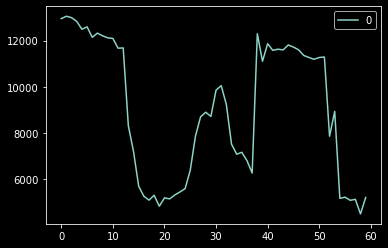

In [52]:
import matplotlib.pyplot as plt
entDF = pd.DataFrame(entropy)
plt.style.use('dark_background')
entDF.plot()

In [21]:
for i in range(5):
    temp = listState[i]
    gt.draw_hierarchy(temp, output="state"+str(i)+".png", vcmap=cm.magma)

In [ ]:

    #name = 'C:/Users/marialavrovskaa/Desktop/Images/file_' + str(image_no) + '.jpg'